#### Note if we want ot use RESNET replace VGG16 with RESNET 

In [ ]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [6]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input


In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation,GlobalMaxPooling2D,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from glob import glob

In [9]:
import os
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
## INPUT PATH DEFINE 
X_train='C:/Users/C-Dot/Desktop/onkar sir/tejas sir/image/vehicles/train'
X_test='C:/Users/-Dot/Desktop/onkar sir/tejas sir/image/vehicles/test'



In [13]:
# re-size all the images to this  VGG16 works on 224,224 size
IMAGE_SIZE = [224, 224]

In [14]:
# add preprocessing layer to the front of VGG
# include_top=False means last layer is getting removed 
## this code is alreadu given in Keras 
## weights='imagenet' for reuseing the weights

## vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
## vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
## rest = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
## inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

rest = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


In [15]:
# don't train existing weights
for layer in rest.layers:         ## for layer in rest.layers // for layer in inception.layers // for layer in vgg.layers
    layer.trainable = False     ## IF we keep true then model will train again and again 

In [16]:
# useful for getting number of classes
folders=glob('C:/Users/C-Dot/Desktop/onkar sir/tejas sir/image/vehicles/train/*') ## * have to be included this will decide no of folders
folders

['C:/Users/C-Dot/Desktop/onkar sir/tejas sir/image/vehicles/train\\buses',
 'C:/Users/C-Dot/Desktop/onkar sir/tejas sir/image/vehicles/train\\cars']

In [17]:
# our layers - you can add more if you want // dense(512) // activation='relu'
x = Flatten()(rest.output)       ## x = Flatten()(rest.output) // x = Flatten()(inception.output) //x = Flatten()(vgg.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x) ## we have 2 features normal and phenoma /instead of 2 we can provide (len(folders))
## x = Dropout(0.5)(prediction)

In [18]:
prediction

<KerasTensor shape=(None, 2), dtype=float32, sparse=False, name=keras_tensor_312>

In [19]:
# create a model object
model = Model(inputs=rest.input, outputs=prediction)  

## model = Model(inputs=vgg.input, outputs=prediction) 
## model = Model(inputs=rest.input, outputs=prediction)
## model = Model(inputs=inception.input, outputs=prediction)

In [20]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 102,402 (400.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [21]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [24]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/C-Dot/Desktop/onkar sir/tejas sir/image/vehicles/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 52 images belonging to 2 classes.


In [34]:
test_set = test_datagen.flow_from_directory(r'C:/Users/C-Dot/Desktop/onkar sir/tejas sir/image/vehicles/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 52 images belonging to 2 classes.


In [36]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,  # Set to the desired number of epochs
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/5


C:\Users\C-Dot\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 48s 18s/step - accuracy: 0.7256 - loss: 0.6369 - val_accuracy: 0.9615 - val_loss: 0.4189
Epoch 2/5


C:\Users\C-Dot\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 463ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 10s/step - accuracy: 0.9577 - loss: 0.3305 - val_accuracy: 0.9615 - val_loss: 0.3442
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 8s/step - accuracy: 0.9744 - loss: 0.2867 - val_accuracy: 0.9423 - val_loss: 0.0926


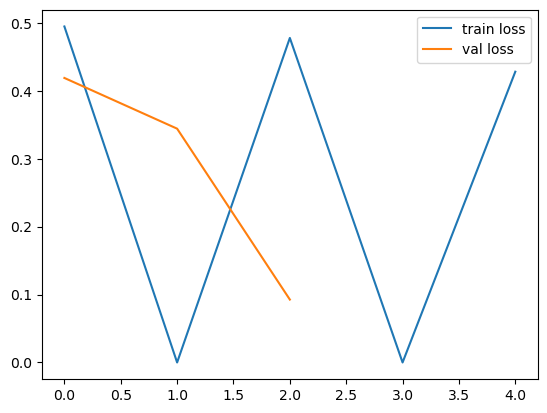

<Figure size 640x480 with 0 Axes>

In [37]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

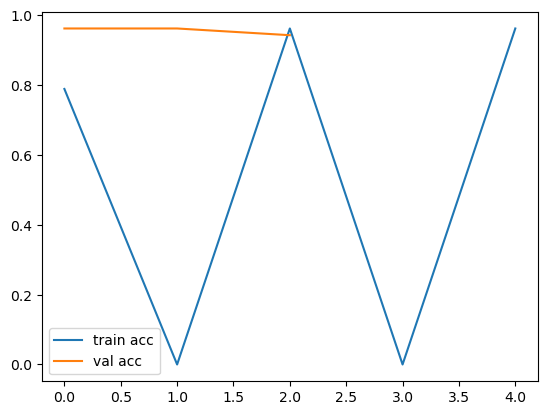

<Figure size 640x480 with 0 Axes>

In [38]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')